In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import sympy as smp # symbolic python, for equations
import pprint # pretty printer

# Ask jupyter to display plots inline
%matplotlib inline

# OSX specific (for a nicer display on "retina" screen)
%config InlineBackend.figure_format = 'retina'

# Vector plotting function -- feel free to reuse this in the linear algebra exercises
def plot_vec(origin,x,y,color='black'):
    ax = plt.gca()
    ax.quiver(*origin, x, y, color=color,angles='xy', scale_units='xy', scale=1)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_xlim([-np.amax(np.abs(x)),np.amax(np.abs(x))])
    ax.set_ylim([-np.amax(np.abs(y)),np.amax(np.abs(y))])
    ax.grid()
    return ax


---

1. Represent the following vectors of ${\rm I\!R}^{2}$ on a plane with two orthogonal axes

In [2]:
V = np.zeros((10,2))
V[0] = np.array([0,2])
V[1] = np.array([3, -1])
V[2] = 2*np.array([1, -3])
V[3] = np.array([2,4]) - np.array([0,-2])
V[4] = np.array([1,4]) + 3*np.array([2,-1])
V[5] = 5*np.array([1,1]) + 2*np.array([-2,1])
V[6] = (np.array([[1,3],[0,2]]) @ np.array([[-1],[2]])).T
V[7] = (np.array([[-2,1],[1,2]]) @ np.array([[1],[3]])).T
V[8] = (np.array([[0,2],[-1,1]]) @ np.array([[3],[1]])).T
V[9] = ((np.array([[1,3],[0,2]]) + np.array([[-2,1],[1,2]])) @ np.array([[1],[3]])).T

print(V)

[[ 0.  2.]
 [ 3. -1.]
 [ 2. -6.]
 [ 2.  6.]
 [ 7.  1.]
 [ 1.  7.]
 [ 5.  4.]
 [ 1.  7.]
 [ 2. -2.]
 [11. 13.]]


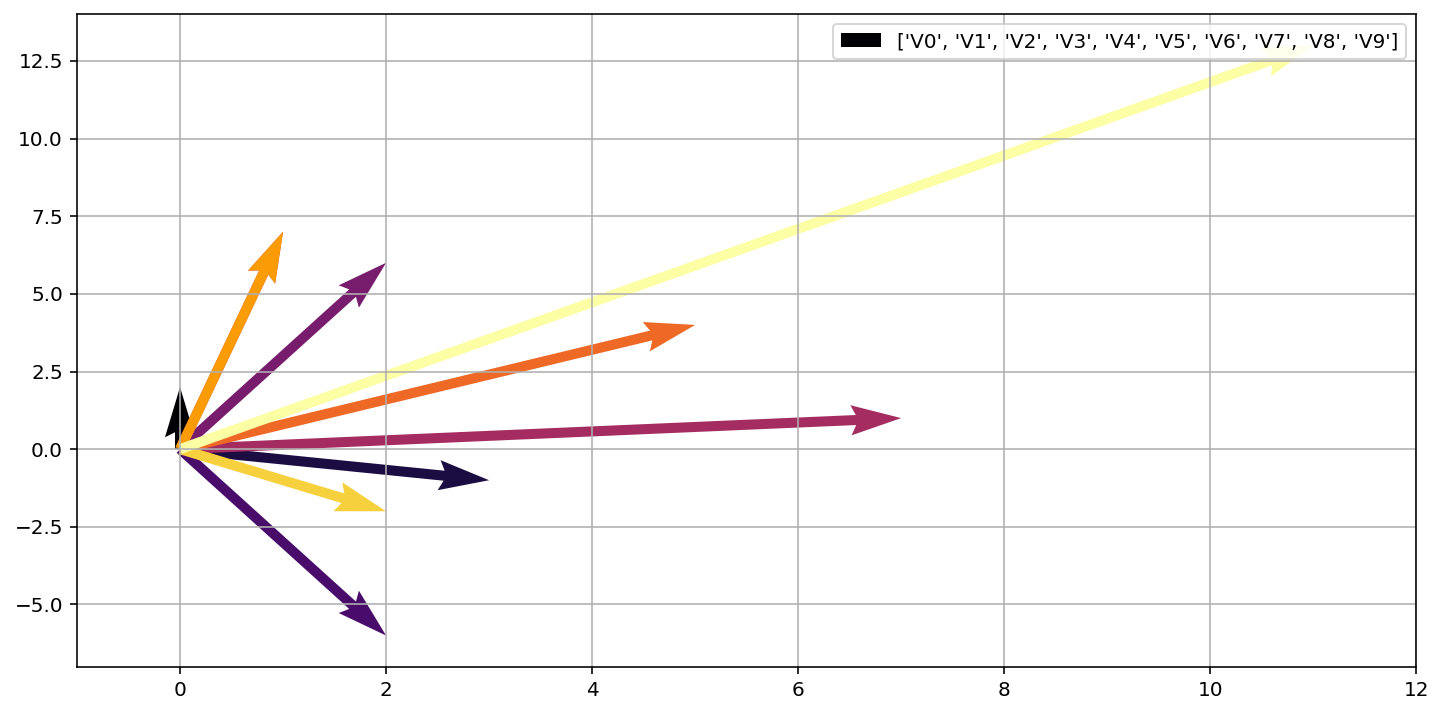

In [3]:
origin = np.zeros((2,10)) # origin point

# Color each vector separately
colors = np.arange(np.max(V.shape))
labels = ['V'+str(i) for i in colors]

# Select a colormap
colormap = cm.inferno

# Normalize the colormap
norm = Normalize()
norm.autoscale(colors)

fig, ax = plt.subplots(1,figsize=(12,6))
plt.quiver(*origin,
           V[:,0],
           V[:,1],
           scale=1,
           scale_units='xy',
           angles = 'xy',
           label=labels,
           color=colormap(norm(colors)))
plt.xlim((V[:,0].min()-1, V[:,0].max()+1))
plt.ylim(( V[:,1].min()-1, V[:,1].max()+1))
plt.grid()
plt.legend()

plt.show()


---

2. Find the scalar $k$ for which the vector $k \begin{bmatrix}1 & 2 & 1 & 3 & 1\end{bmatrix}$ is a unit vector of $R^5$.


The norm of the vector when $k=1$ is 4. This is given by the formula $\sqrt{1^2 + 2^2 + 1^2 + 3^2 + 1^2}$. In order for the vector to have a magnitude of 1, we need to solve the following for k:

$\sqrt{k^2 + (2k)^2 + k^2 + (3k)^2 + k^2} = 1$

The above formula is equal to $k \lVert \vec{v} \rVert_2$. Given that we already calculated that $\lVert \vec{v} \rVert_2  = 4$, $k=0.25$.

In [4]:
# The vector has to have a length (norm2) of 1
v = np.array([[1,2,1,3,1]])
print('Vector magnitude: ', np.linalg.norm(v), '(a.u.)')

k = 1/np.linalg.norm(v)

print('Scaling factor k is: ', k)
print('Vector magnitude w/ new k: ', np.linalg.norm(k*v), '(a.u)')


Vector magnitude:  4.0 (a.u.)
Scaling factor k is:  0.25
Vector magnitude w/ new k:  1.0 (a.u)



---

3. Equation systems in the form $M X = P$, where $X =\begin{bmatrix} x & y & z \end{bmatrix}^T \in {\rm I\!R}^{3}$. Since $M$ is multiplied with $\vec{x}$, a column vector, $M$ is going to be a matrix of size $(3x3)$ and each row will contain the scalars in front of the vecto elements $x,y,z$ per equation. To solve the equation systems, we will calculate the inverse, $M^{-1}$, and solve for $\vec{v}$. The solution is shown below, in code.

In [5]:
# First system of equations
M1 = np.array([[1,1,2],[1,2,1],[2,1,1]])
P1 = np.array([[3],[1],[0]])

x,y,z = smp.symbols('x,y,z')
X = np.array([[x],[y],[z]])
print(M1@X)

print(np.linalg.det(M1))

X_sol = np.round(np.linalg.inv(M1)@P1, 4)

print()

print('Solution X= \n', X_sol)
print()
# Evaluation
print('Evaluation: \n', M1@X_sol == P1)

[[x + y + 2*z]
 [x + 2*y + z]
 [2*x + y + z]]
-4.0

Solution X= 
 [[-1.]
 [ 0.]
 [ 2.]]

Evaluation: 
 [[ True]
 [ True]
 [ True]]


In [6]:
# Second system of equations
M2 = np.array([[1,0,2],[0,-1,1],[1,-2,0]])
P2 = np.array([[1],[2],[1]])

X_sol = np.round(np.linalg.inv(M2)@P2, 4)

print('Solution X= \n', X_sol)

# Evaluation
print('Evaluation: \n', M2@X_sol == P2)

Solution X= 
 [[-1.]
 [-1.]
 [ 1.]]
Evaluation: 
 [[ True]
 [ True]
 [ True]]


---

4. Same as before. The equations correspond to lines in 2D space. The solution to the system is the crossing point of the lines and can be calculated analytically by computing $M^{-1}$ and solving the system as before. The crossing point is given as:

$$
\begin{matrix}
P = \begin{bmatrix} \frac{6}{m-2} \\ \frac{-3}{m-2} \end{bmatrix},& m^2\neq4
\end{matrix}
$$

The code below calculates the determinant and the inverse of $M$. Use these to evaluate your solution.

**hint**: $4 - m^2 = 2^2 - m^2 = (2+m)(2-m)$

In [7]:
x,y = smp.symbols('x,y')
m = smp.Symbol('m')

M = smp.Matrix(np.array([[1,m],[m,4]]))
P = np.array([[-3],[6]])

print('Matrix determinant: ', M.det()) # This must be != 0 for the matrix to be invertible. Therefore m!=+-2
print('Inverse of matrix M: ', M.inv()) # Matrix inverse
print('Solve: ', M.inv()@P)

Matrix determinant:  4 - m**2
Inverse of matrix M:  Matrix([[4/(4 - m**2), -m/(4 - m**2)], [-m/(4 - m**2), 1/(4 - m**2)]])
Solve:  Matrix([[-6*m/(4 - m**2) - 12/(4 - m**2)], [3*m/(4 - m**2) + 6/(4 - m**2)]])


<Figure size 360x360 with 0 Axes>

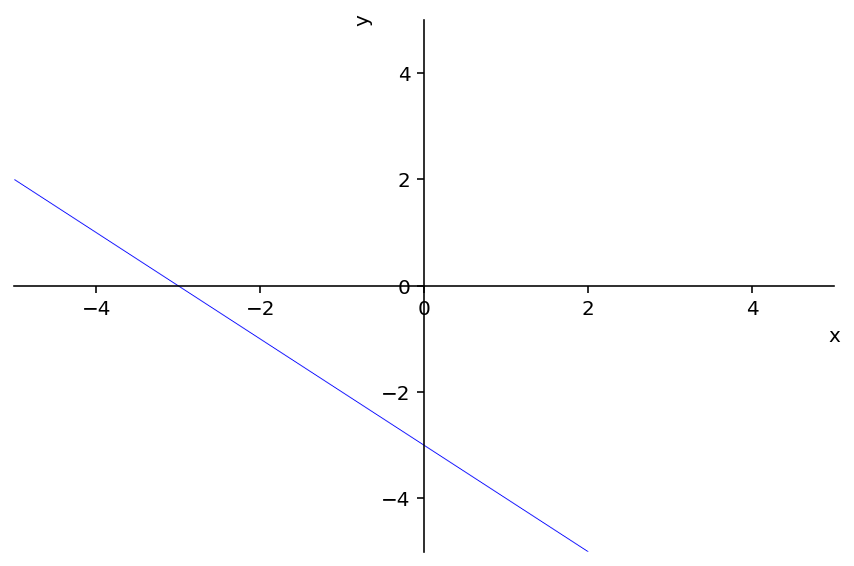

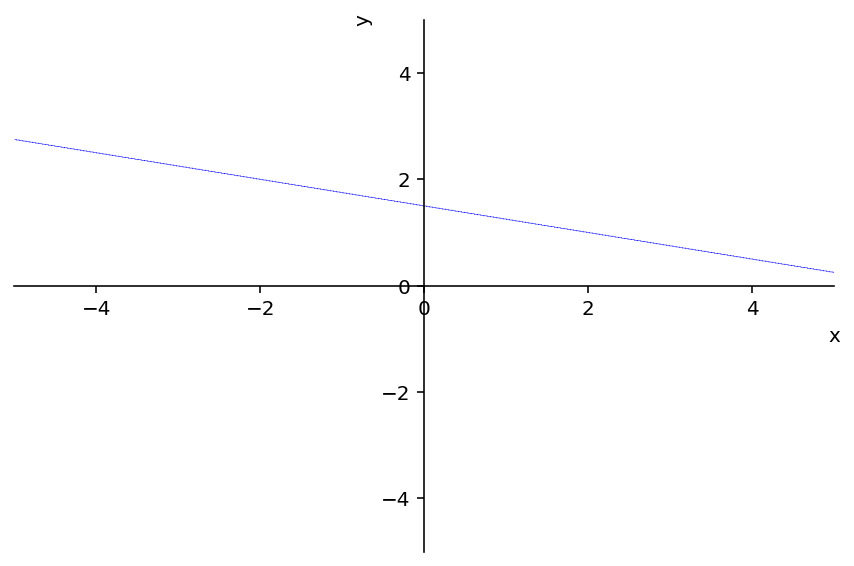

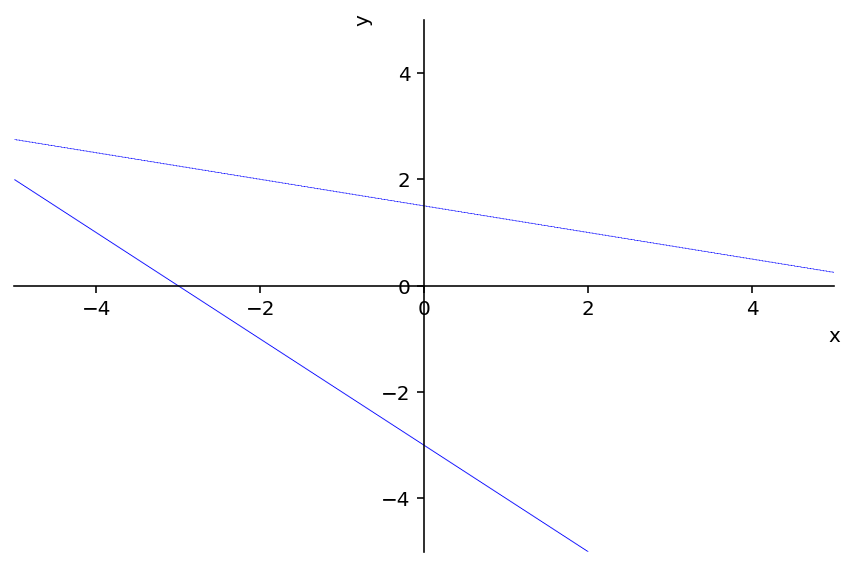

In [8]:
# example plot for m = 1
#M1 = M.subs('m',1)
#b = smp.Matrix([[x],[y]])

Eq1 = smp.Eq(x + m*y, -3)
Eq2 = smp.Eq(m*x + 4*y, 6)

mval = 1

fig4 = plt.figure(figsize=(5,5))
line1 = smp.plot_implicit(Eq1.subs('m',mval))
line2 = smp.plot_implicit(Eq2.subs('m',mval))

line1.extend(line2)
line1.show()


---

5. Calculation of products done by hand. You can use sympy for the evaluation, as in the example below

In [9]:
x = np.array([[1],[-1]])
y = np.array([[smp.symbols('y1')],[smp.symbols('y2')]])
print('1.\n',x.T @ y)
print('Dimensionality: ',(x.T @ y).shape)

W = np.array([[smp.symbols('w11'), smp.symbols('w12')],
              [smp.symbols('w21'), smp.symbols('w22')]])

x_sym = np.array([[smp.symbols('x1')],
                  [smp.symbols('x2')]])

print()
print('2.\n', W@x_sym)
print('Dimensionality: ', (W@x_sym).shape)

x11,x12,x13,x21,x22,x23 = smp.symbols('x11,x12,x13,x21,x22,x23')
X = np.array([[x11,x12,x13],[x21,x22,x23]])

print()
print('3.\n', X@X.T)
print('Dimensionality: ', (X@X.T).shape)

1.
 [[y1 - y2]]
Dimensionality:  (1, 1)

2.
 [[w11*x1 + w12*x2]
 [w21*x1 + w22*x2]]
Dimensionality:  (2, 1)

3.
 [[x11**2 + x12**2 + x13**2 x11*x21 + x12*x22 + x13*x23]
 [x11*x21 + x12*x22 + x13*x23 x21**2 + x22**2 + x23**2]]
Dimensionality:  (2, 2)


---

6. Find all possible products among the matrices.

These are AC (1x2), AE (1x3), DB (2x1), EC (3x2), DD (2x2), EE (3x3)

In [10]:
A = np.array([[1,2,3]])
B = np.array([[1],[-2]])
C = np.array([[2,1],[-3,0],[1,2]])
D = np.array([[-2,5],[5,0]])
E = np.array([[-1,1,3],[-1,-4,0],[0,2,5]])

print('Dimensionality:')
print('A: ', A.shape)
print('B: ', B.shape)
print('C: ', C.shape)
print('D: ', D.shape)
print('E: ', E.shape)

# list example
matlist = [A,B,C,D,E]
matlab = ['A','B','C','D','E']

# dictionary example
matdic = {'A':A,
         'B':B,
         'C':C,
         'D':D,
         'E':E}

print('-----------------')
print('Products:')
for ii in matlab:
    for jj in matlab:
        print(ii+jj,':')
        try:
            print(matdic[ii] * matdic[jj])
        except:
            print('element-wise product not defined')
            
        try:
            print(matdic[ii] @ matdic[jj])
        except:
            print('not defined')
        print()

Dimensionality:
A:  (1, 3)
B:  (2, 1)
C:  (3, 2)
D:  (2, 2)
E:  (3, 3)
-----------------
Products:
AA :
not defined

AB :
not defined

AC :
[[-1  7]]

AD :
not defined

AE :
[[-3 -1 18]]

BA :
[[ 1  2  3]
 [-2 -4 -6]]

BB :
not defined

BC :
not defined

BD :
not defined

BE :
not defined

CA :
not defined

CB :
[[ 0]
 [-3]
 [-3]]

CC :
not defined

CD :
[[  1  10]
 [  6 -15]
 [  8   5]]

CE :
not defined

DA :
not defined

DB :
[[-12]
 [  5]]

DC :
not defined

DD :
[[ 29 -10]
 [-10  25]]

DE :
not defined

EA :
not defined

EB :
not defined

EC :
[[-2  5]
 [10 -1]
 [-1 10]]

ED :
not defined

EE :
[[ 0  1 12]
 [ 5 15 -3]
 [-2  2 25]]



---

7.  This exercise correlates with the video [Nonsquare matrices as transformations between dimensions | Chapter 8, Essence of linear algebra](https://www.youtube.com/watch?v=v8VSDg_WQlA&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=8). To solve the exercise, we transform a 3D vector to a 4D one. So our matrix $U$ will have dimensionality of $(3,4)$.

In [11]:
x,y,z = smp.symbols('x,y,z')

v = smp.Matrix([x,y,z])
print(v)

U = np.array([[-1,1,0],[1,-1,0],[-1,0,1],[0,-1,1]])

print(U@v)

Matrix([[x], [y], [z]])
Matrix([[-x + y], [x - y], [-x + z], [-y + z]])


To determine if the vectors $\vec(u_x), \vec(u_y), \vec(u_z)$ are orthogonal, we will calculate their inner product using numpy's `inner`:

In [12]:
ux = np.array([[1,0,0]])
uy = np.array([[0,1,0]])
uz = np.array([[0,0,1]])

print(np.inner(ux,uy))
print(np.inner(ux,uz))
print(np.inner(uy,uz))
print('The vectors are bases of the 3D space, therefore they are orthogonal! They have inner products of 0!')

[[0]]
[[0]]
[[0]]
The vectors are bases of the 3D space, therefore they are orthogonal! They have inner products of 0!


---

8. Calculate, when defined, the products of AB and BA
    1. Product is zero in both cases
    2. $A_{3x3}$, $B_{2,3}$. AB is not defined; BA is defined and has dimensionality $(BA)_{2x3}$.
    3. $A_{3x2}$, $B_{2,4}$. AB is defined and has dimensionality $(AB)_{3x4}$. BA is not defined

In [13]:
# (a)
A = np.array([[1,0],[0,0]])
B = np.array([[0,0],[0,1]])
print('AB: \n', A@B, '\nBA: \n', B@A)

# (b)
A = np.array([[0,2,1],[1,1,0],[-1,-2,-1]])
B = np.array([[2,0,1],[-1,1,2]])

print('--------------------')
print('(b)')
print('AB: ')
try:
    print(A@B)
except:
    print('not defined')

print('BA: ')
try:
    print(B@A)
except:
    print('not defined')

# (c)
A = np.array([[1,2],[1,1],[0,3]])
B = np.array([[-1,1,0,1],[2,1,0,0]])

print('--------------------')
print('(c)')
print('AB: ')
try:
    print(A@B)
except:
    print('not defined')

print('BA: ')
try:
    print(B@A)
except:
    print('not defined')

AB: 
 [[0 0]
 [0 0]] 
BA: 
 [[0 0]
 [0 0]]
--------------------
(b)
AB: 
not defined
BA: 
[[-1  2  1]
 [-1 -5 -3]]
--------------------
(c)
AB: 
[[3 3 0 1]
 [1 2 0 1]
 [6 3 0 0]]
BA: 
not defined


---

9. Calculate $AB$ and $AC$. May $A$ be invertible? Find all 3x3 matrices $M$ such that $AM=0$.

In [14]:
A = np.array([[1,0,0], [0,1,1], [3,1,1]])
B = np.array([[1,1,1], [0,1,0], [1,0,0]])
C = np.array([[1,1,1], [1,2,1], [0,-1,-1]])
M = np.array([smp.symbols('m11:14'),
            smp.symbols('m21:24'),
            smp.symbols('m31:34')])

print('AB:\n',A@B)
print('---------------')
print('AC:\n',A@C)

print('Determinant of A: ', np.linalg.det(A))
#np.linalg.inv(A) # this produces an error, matrix is singular

print('---------------')
print('M:\n',M)
print('---------------')
print('AM:\n',A@M)

AB:
 [[1 1 1]
 [1 1 0]
 [4 4 3]]
---------------
AC:
 [[1 1 1]
 [1 1 0]
 [4 4 3]]
Determinant of A:  0.0
---------------
M:
 [[m11 m12 m13]
 [m21 m22 m23]
 [m31 m32 m33]]
---------------
AM:
 [[m11 m12 m13]
 [m21 + m31 m22 + m32 m23 + m33]
 [3*m11 + m21 + m31 3*m12 + m22 + m32 3*m13 + m23 + m33]]


Given the above, we have:

1. First row:
    * $m_{11} = m_{12} = m_{13} = 0$; 
2. Second row:
    * $m_{21} = -m_{31}$
    * $m_{22} = -m_{32}$
    * $m_{23} = -m_{33}$
3. Third row:
    * $3m_{11}+m_{21}+m_{31} = 0$
    * $3m_{12} + m_{22} + m_{32} = 0$
    * $3m_{13} + m_{23} + m_{33} = 0$


---

10. We must solve the equation $AB = BA$. We are given A, therefore we can calculate both $AB$ and $BA$ and equate their elements. This will produce 4 equations. Solving them yields

$$ B = \begin{bmatrix} x & y \\ 0 & x \end{bmatrix}, x,y\in{ $$

In [42]:
a,b = smp.symbols('a,b')

b11,b12,b21,b22 = smp.symbols('b11,b12,b21,b22')

A = smp.Matrix([[a,b],[0,a]])
B = smp.Matrix([[b11,b12],[b21,b22]])

print('AB:')
pprint.pprint(A@B)
print()
print('BA:')
pprint.pprint(B@A)

Bt = np.array([[2,1],[0,2]])
print()
print(A@Bt==Bt@A)

AB:
Matrix([
[a*b11 + b*b21, a*b12 + b*b22],
[        a*b21,         a*b22]])

BA:
Matrix([
[a*b11, a*b12 + b*b11],
[a*b21, a*b22 + b*b21]])

False


---

11. A and B are 2x2 matrices and we must solve $AB=0$, $BA\neq0$.

In [25]:
a11,a12,a21,a22 = smp.symbols('a11,a12,a21,a22')
b11,b12,b21,b22 = smp.symbols('b11,b12,b21,b22')

A = smp.Matrix([[a11,a12],[a21,a22]])
B = smp.Matrix([[b11,b12],[b21,b22]])

print('Product of AB:')
pprint.pprint(A@B)
print()
print('Product of BA:')
pprint.pprint(B@A)

Product of AB:
Matrix([
[a11*b11 + a12*b21, a11*b12 + a12*b22],
[a21*b11 + a22*b21, a21*b12 + a22*b22]])

Product of BA:
Matrix([
[a11*b11 + a21*b12, a12*b11 + a22*b12],
[a11*b21 + a21*b22, a12*b21 + a22*b22]])


---

12. Let's calculate the matrices for $n\in[2,5]$. Do you notice anything?

In [21]:
# Define the matrices
A = np.array([[1.,-1.],[-1.,1.]])
B = np.array([[1.,1.],[0.,2.]])

# max power
N = 6

for n in np.arange(2,N):
    print('A^',n,':\n',A**n)
    print('B^',n,':\n',B**n)
    print('---------------------')

A^ 2 :
 [[1. 1.]
 [1. 1.]]
B^ 2 :
 [[1. 1.]
 [0. 4.]]
---------------------
A^ 3 :
 [[ 1. -1.]
 [-1.  1.]]
B^ 3 :
 [[1. 1.]
 [0. 8.]]
---------------------
A^ 4 :
 [[1. 1.]
 [1. 1.]]
B^ 4 :
 [[ 1.  1.]
 [ 0. 16.]]
---------------------
A^ 5 :
 [[ 1. -1.]
 [-1.  1.]]
B^ 5 :
 [[ 1.  1.]
 [ 0. 32.]]
---------------------


---

13. The matrix $A$ is given above. Let's calculate the two sides of the equation and then proceed to find the inverse of the given matrix.

In [18]:
I = np.eye(2) # 2x2 identity matrix
#print(I)

print('A^2:\n',A**2)
print()
print('2*I-A:\n', 2*I-A)
print('------------------')

# Inverse of 3x3 A matrix
A33 = np.array([[-1.,1.,1.],[1.,-1.,1.],[1.,1.,-1.]])
print('A_3x3:\n',A33)
print('------------------')
print('Inverse:\n',np.linalg.inv(A33))

A^2:
 [[1. 1.]
 [1. 1.]]

2*I-A:
 [[1. 1.]
 [1. 1.]]
------------------
A_3x3:
 [[-1.  1.  1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]]
------------------
Inverse:
 [[-0.   0.5  0.5]
 [ 0.5  0.   0.5]
 [ 0.5  0.5  0. ]]


---

14. Let's calculate the inverse of the matrix for N=3,5,10. Do you see a pattern?

In [19]:
for N in (3,5,10):
    A = np.ones((1,N))

    for ii in np.arange(1,N):
        tmp = np.ones((1,N))
        tmp[0,:ii] = 0
        A = np.vstack((A,tmp))
    
    print('N=',N)
    print('A:\n')
    print(A)
    print()
    print('rank(A)=', np.linalg.matrix_rank(A))
    print('det(A)=',np.linalg.det(A))
    
    print()
    print('inv(A):\n')
    print(np.linalg.inv(A))
    print('------------------')

N= 3
A:

[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]

rank(A)= 3
det(A)= 1.0

inv(A):

[[ 1. -1.  0.]
 [ 0.  1. -1.]
 [ 0.  0.  1.]]
------------------
N= 5
A:

[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]

rank(A)= 5
det(A)= 1.0

inv(A):

[[ 1. -1.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.]
 [ 0.  0.  0.  1. -1.]
 [ 0.  0.  0.  0.  1.]]
------------------
N= 10
A:

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

rank(A)= 10
det(A)= 1.0

inv(A):

[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.  0.  0. 